In [ ]:
#Date:8/10/2021
#Author: Maggie Bao
#Description: Two 4-bit numbers are inputs to the program, and the algorithm determines if the first is greater than the second number.

In [2]:
#Importing standard Qiskit libraries
from qiskit import *
from qiskit import QuantumCircuit#Import necessary packages
from qiskit import Aer, execute
from qiskit.visualization import *
import numpy as np
import matplotlib as mpl

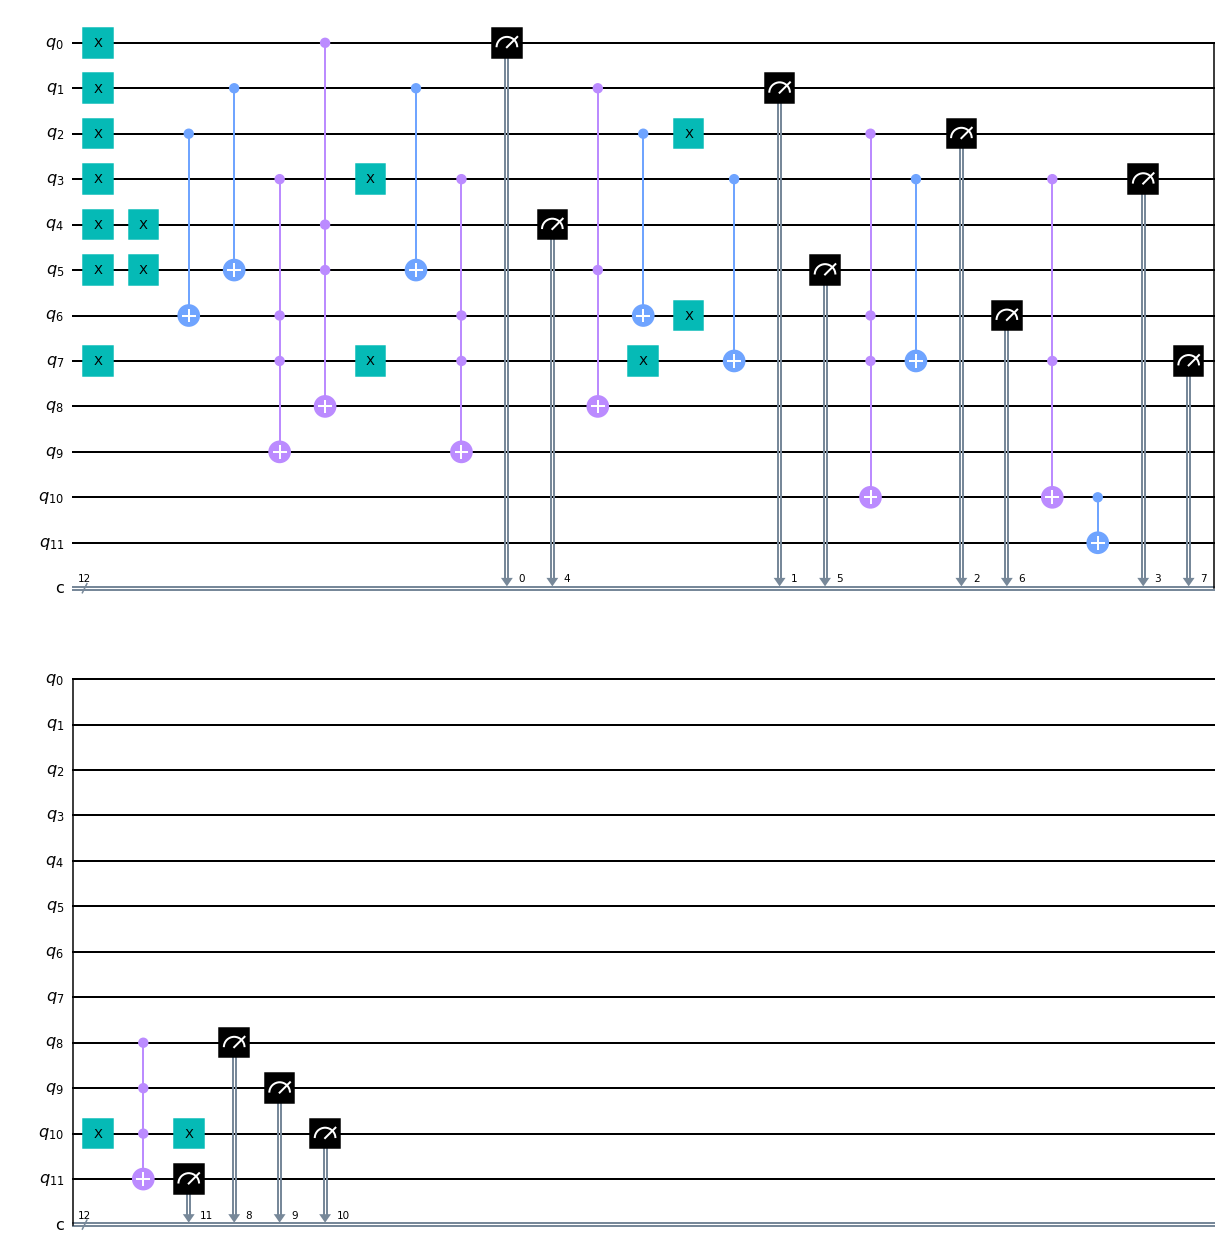

In [3]:
#A>B
circtest=QuantumCircuit(12, 12)
circtest.x([0,1,4,5])
a0=0
a1=1
a2=2
a3=3
b0=4
b1=5
b2=6
b3=7
x=8
v=9
z=10
f=11

#x: a10>b10
circtest.x([b0,b1])
circtest.cx(a1,b1)
circtest.mct([a0,b0,b1],x)
circtest.cx(a1,b1)
circtest.mct([a1,b1],x)

#v: a32=b32
circtest.x([a2,a3,b3])
circtest.cx(a2,b2)
circtest.mct([a3,b2,b3],v)
circtest.x([a3,b3])
circtest.mct([a3,b2,b3],v)
circtest.cx(a2,b2)
circtest.x(a2)

#z: a32>b32
circtest.x([b2,b3])
circtest.cx(a3,b3)
circtest.mct([a2,b2,b3],z)
circtest.cx(a3,b3)
circtest.mct([a3,b3],z)

#final
circtest.cx(z,f)
circtest.x(z)
circtest.mct([x,v,z],f)
circtest.x(z)

circtest.measure([0,1,2,3,4,5,6,7,8,9,10,11],[0,1,2,3,4,5,6,7,8,9,10,11])
circtest.draw('mpl')

{'001011000011': 1000}


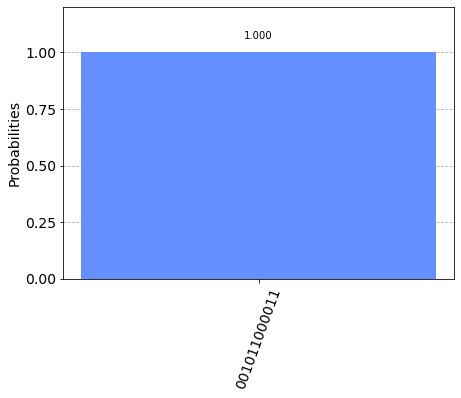

In [4]:
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circtest, backend_sim, shots=1000)
sim_result = sim.result()
counts = sim_result.get_counts(circtest)
print(counts)
from qiskit.visualization import plot_histogram #histogram
plot_histogram(counts)